In [ ]:
##### The feature is longitude values (from the California housing dataset)
##### It range approximately from -124 to -114. 
##### Given that these values represent geographical coordinates rather than numerical magnitudes, normalizing them should be done with care.

In [87]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer, MinMaxScaler
import matplotlib.pyplot as plt

In [88]:
# Create Plotting Function

def plot_feature(feature: np.ndarray = None, color='royalblue', title: str = None):
    plt.figure(figsize=(14, 3), facecolor='lightgray')
    plt.suptitle(t=title, fontsize=10, fontweight='bold', color='midnightblue')

    plt.subplot(1, 2, 1)
    plt.hist(x=feature, bins=35, color=color, edgecolor='black', alpha=0.8)
    plt.axvline(x=np.mean(feature), color='red', label=f'mean: {np.mean(feature):.2f}')
    plt.axvline(x=np.median(feature), color='navy', label=f'median: {np.median(feature):.2f}')
    plt.grid(visible=True, which='major', linestyle='--', alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.boxplot(x=feature, 
                vert=False, 
                meanline=True,
                showmeans=True,
                patch_artist=True, 
                boxprops=dict(facecolor='lightgrey', color='black', linewidth=1.5, alpha=0.8), 
                whiskerprops=dict(color='black', linewidth=1.5), 
                capprops=dict(color='black', linewidth=1.5), 
                medianprops=dict(color='navy', linewidth=2, linestyle='-'),
                meanprops=dict(color='red', linewidth=2, linestyle='-'),
                flierprops=dict(markerfacecolor='gray', marker='o', markersize=6)
                )
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

In [89]:
# Load the California housing dataset
X, y = fetch_california_housing(return_X_y=True)

In [90]:
# Feature Information (Descriptive Statistics)
feature = X[:, 7]  # Selecting Feature 7
print(f'Number of observations: {feature.shape[0]}')
print(f'Data type: {feature.dtype}')
print(f'Maximum value: {np.max(feature):.2f}')
print(f'Minimum value: {np.min(feature):.2f}')
print(f'Mean: {np.mean(feature):.2f}')
print(f'Median: {np.median(feature):.2f}')
print(f'Standard Deviation: {np.std(feature):.2f}')

Number of observations: 20640
Data type: float64
Maximum value: -114.31
Minimum value: -124.35
Mean: -119.57
Median: -118.49
Standard Deviation: 2.00


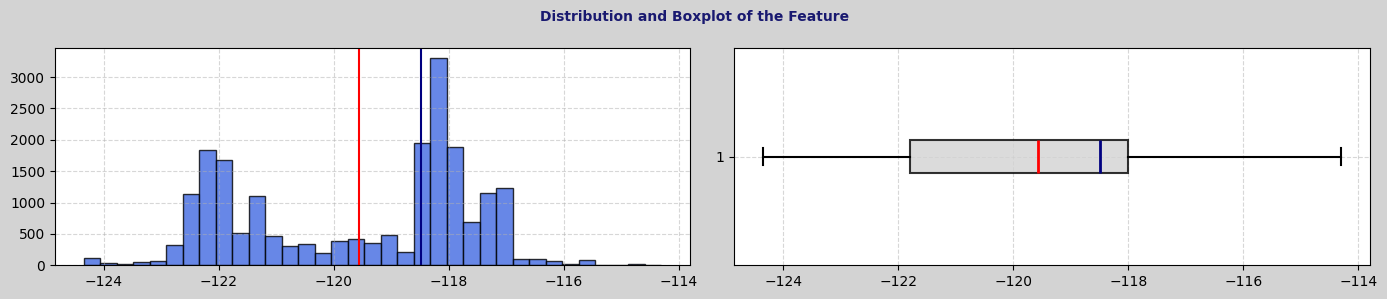

In [91]:
# Plot the Feature
# color_list = ['wheat', 'royalblue', 'indianred', 'olive', 'mediumpurple', 'tan', 'dimgrey', 'teal']
plot_feature(feature=feature, color='royalblue', title='Distribution and Boxplot of the Feature')


##### **Normalizing Feature 7 - Shifting, Log Transformation and Standardization**

In [92]:
# Define the shifting function
def shift_data(x):
    min_value = np.min(x)
    shifted_data = x + np.abs(min_value) + 1  
    return shifted_data

# Apply the transformation
shifting_transformer = FunctionTransformer(func=shift_data)
feature_shifted = shifting_transformer.fit_transform(feature.reshape(-1, 1))

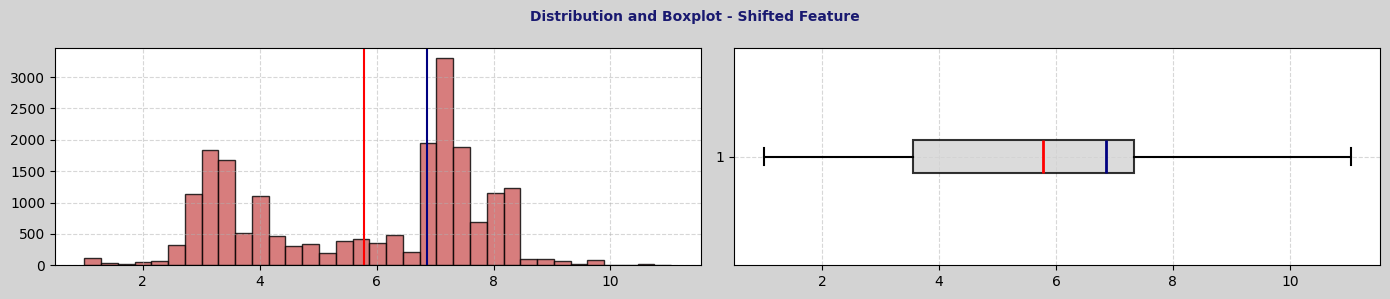

In [93]:
# Plot the Shifted Feature
plot_feature(feature=feature_shifted.flatten(), color='indianred', title='Distribution and Boxplot - Shifted Feature')

In [94]:
# Apply log(x + 1) transformation
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
feature_log_transformed = log_transformer.transform(feature_shifted)

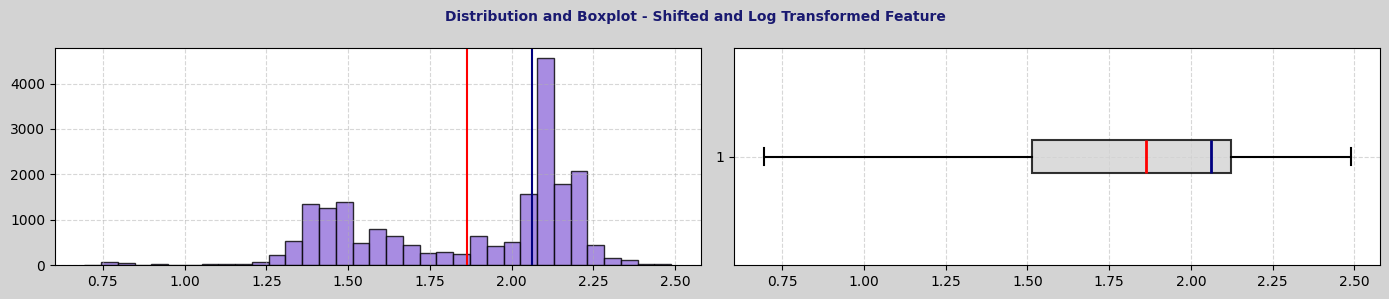

In [95]:
# Plot the Log Transformed Feature
plot_feature(feature=feature_log_transformed.flatten(), color='mediumpurple', 
             title='Distribution and Boxplot - Shifted and Log Transformed Feature')

In [96]:
# Standardize the feature
standardize = StandardScaler()
feature_standardized = standardize.fit_transform(feature_log_transformed.reshape(-1, 1))

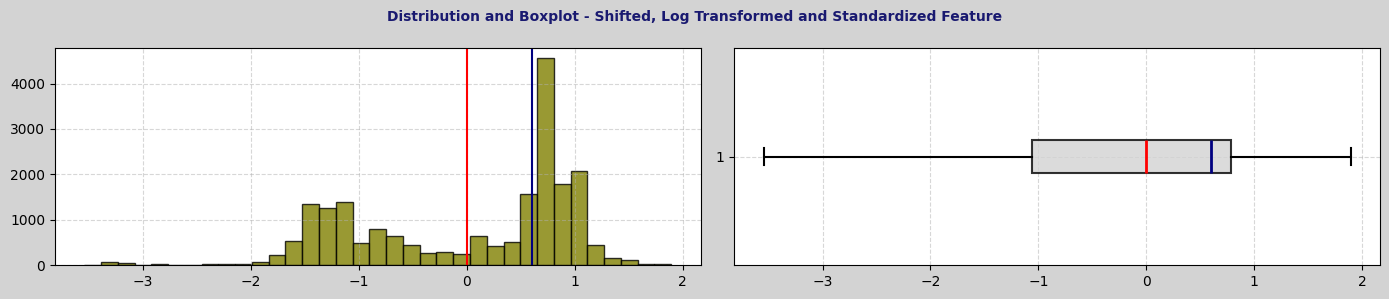

In [97]:
# Plot the Standardized Feature
plot_feature(feature=feature_standardized.flatten(), color='olive', 
             title='Distribution and Boxplot - Shifted, Log Transformed and Standardized Feature')

##### **Normalizing Feature 7 - Power Transformation (Yeo-Johnson) and Standardization**

In [98]:
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
feature_power_transformed = power_transformer.fit_transform(X=feature.reshape(-1, 1))

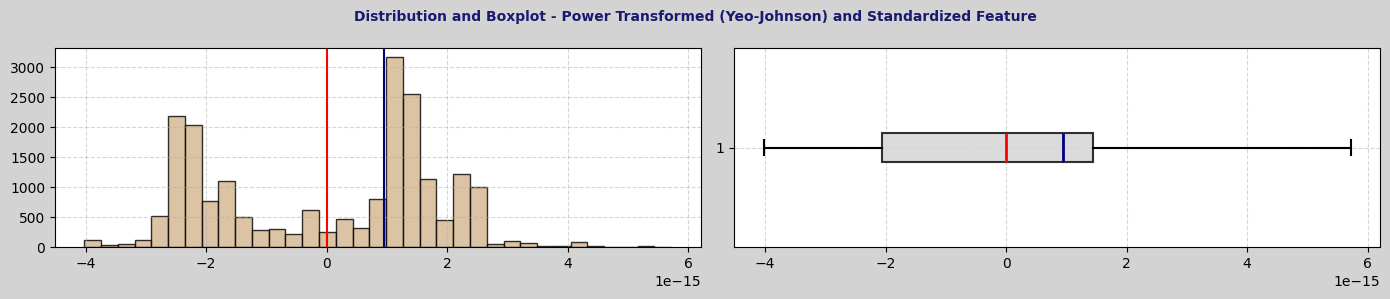

In [99]:
# Plot the Standardized Feature
plot_feature(feature=feature_power_transformed.flatten(), color='tan', 
             title='Distribution and Boxplot - Power Transformed (Yeo-Johnson) and Standardized Feature')

##### **Normalizing Feature 7 - Shifting and Min-Max Scaling (0 to 1) – If a bounded range is required**

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
feature_min_max_scaled = min_max_scaler.fit_transform(X=feature_shifted)

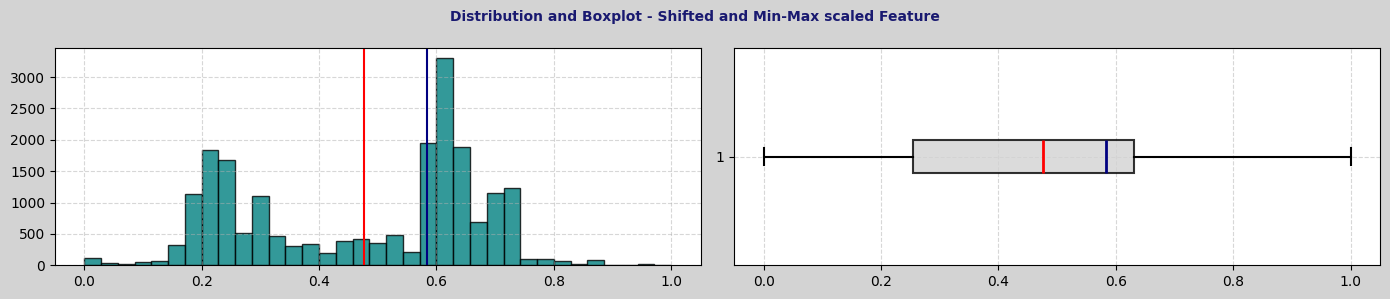

In [109]:
# Plot the Shifted and Min-Max scaled Feature
plot_feature(feature=feature_min_max_scaled.flatten(), color='teal', 
             title='Distribution and Boxplot - Shifted and Min-Max scaled Feature')

In [ ]:
# Final Recommendation:
## If this feature is used in machine learning models, Standardization (Z-score) is generally better.
## If this feature is part of a spatial dataset, leave it unchanged or normalize latitude and longitude together.
## If required for neural networks, Min-Max Scaling might be better.